# a-
Read data from “ratings.csv” with line format: 'userID movieID rating
timestamp'.

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import Image
init_notebook_mode(connected=True)
%matplotlib inline

import surprise
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans

In [4]:
# import data
column_names = ['userID', 'movieID', 'rating', 'timestamp']
dataset = pd.read_csv('small_ratings.csv')
dataset.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [121]:
dataset.describe()

,userId,movieId,rating,timestamp
count,505025.000000,505025.000000,505025.000000,5.050250e+05
mean,2643.815874,16413.554014,3.550094,1.174870e+09
std,1521.560743,31697.729646,1.034868,2.055340e+08
min,1.000000,1.000000,0.500000,8.279472e+08
25%,1261.000000,1073.000000,3.000000,9.934328e+08
50%,2627.000000,2642.000000,4.000000,1.166707e+09
75%,4013.000000,6711.000000,4.000000,1.358880e+09
max,5232.000000,176271.000000,5.000000,1.501822e+09


In [122]:
# load the data into surprise specific data-structure
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)

# b & c-
Compute the average MAE and RMSE of the Probabilistic Matrix Factorization
(PMF), User based Collaborative Filtering, Item based Collaborative Filtering,
under the 5-folds cross-validation

In [123]:
# default setting: distance MSD, k=10
storedata = []

# iterate over all algorithms
for algorithm in [SVD(biased=False), KNNBasic(sim_options = {'user_based': True }), KNNBasic(sim_options = {'user_based': False})]:
    # perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # get results & append algorithm name
    result_append = pd.DataFrame.from_dict(results).mean(axis=0)
    result_append = result_append.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    
    # store data
    storedata.append(tmp)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9046  0.9064  0.9086  0.9060  0.9093  0.9070  0.0017  
MAE (testset)     0.6882  0.6891  0.6898  0.6877  0.6910  0.6892  0.0012  
Fit time          4.17    4.37    4.29    4.23    4.20    4.25    0.07    
Test time         0.45    0.45    0.56    0.53    0.43    0.48    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8998  0.8977  0.9014  0.9046  0.9014  0.9010  0.0023

# d-
Compare the average (mean) performances of User-based collaborative filtering,
item-based collaborative filtering, PMF with respect to RMSE and MAE. Which
ML model is the best in the movie rating data?

In [124]:
storedata = pd.DataFrame(storedata)

In [125]:
# udpate algrithm names 
new_algorithms = ['PMF','UserCF','ItemCF']
storedata['Algorithm'] = new_algorithms

In [126]:
storedata

,test_rmse,test_mae,fit_time,test_time,Algorithm
0,0.948403,0.733304,0.061847,0.132971,PMF
1,0.948403,0.733304,0.061847,0.132971,UserCF
2,0.948403,0.733304,0.061847,0.132971,ItemCF


# e- 
Examine how the cosine, MSD (Mean Squared Difference), and Pearson
similarities impact the performances of User based Collaborative Filtering and
Item based Collaborative Filtering. Plot your results. Is the impact of the three
metrics on User based Collaborative Filtering consistent with the impact of the
three metrics on Item based Collaborative Filtering? 

In [127]:
storedata2 = []

# iterate over all algorithms
for algorithm in [KNNBasic(sim_options = {'name':'cosine','user_based': True}), KNNBasic(sim_options = {'name':'MSD', 'user_based':True }),
                 KNNBasic(sim_options = {'name':'pearson','user_based': True}),
                 KNNBasic(sim_options = {'name':'cosine', 'user_based':False }),KNNBasic(sim_options = {'name':'MSD', 'user_based':False }),
                 KNNBasic(sim_options = {'name':'pearson','user_based': False}) 
                 ]:
    # perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    
    # get results & append algorithm names
    result_append = pd.DataFrame.from_dict(results).mean(axis=0)
    result_append = result_append.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    
    # store data
    storedata2.append(tmp)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [128]:
storedata2 = pd.DataFrame(storedata2)

In [129]:
# udpate algorithm names 
new_algorithms2 = ['Cosine-UserCF','MSD-UserCF','Pearson-UserCF','Cosine-ItemCF','MSD-ItemCF','Pearson-ItemCF']
storedata2['Algorithm'] = new_algorithms2

# store results
results2 = storedata2.set_index('Algorithm').sort_values('test_rmse', ascending=False)
results2

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
Cosine-UserCF,0.948403,0.733304,0.061847,0.132971
MSD-UserCF,0.948403,0.733304,0.061847,0.132971
Pearson-UserCF,0.948403,0.733304,0.061847,0.132971
Cosine-ItemCF,0.948403,0.733304,0.061847,0.132971
MSD-ItemCF,0.948403,0.733304,0.061847,0.132971
Pearson-ItemCF,0.948403,0.733304,0.061847,0.132971


In [130]:
# plotting the results

# prepare the data for plotting
data = results2[['test_rmse', 'test_mae']]
grid = data.values

# create axis labels
x_axis = [label.split('_')[1].upper() for label in data.columns.tolist()]
y_axis = data.index.tolist()

x_label = 'Function'
y_label = 'Algorithm'


# get annotations and hovertext
hovertexts = []
annotations = []

for i, y_value in enumerate(y_axis):
    row = []
    for j, x_value in enumerate(x_axis):
        annotation = grid[i, j]
        row.append('Error: {:.4f}<br>{}: {}<br>{}: {}<br>Fit Time: {:.3f}s<br>Test Time: {:.3f}s'.format(annotation, y_label, y_value ,x_label, x_value, 
                                                                                                         results2.loc[y_value]['fit_time'], 
                                                                                                         results2.loc[y_value]['test_time']))
        annotations.append(dict(x=x_value, y=y_value, text='{:.4f}'.format(annotation), ax=0, ay=0, font=dict(color='#000000')))
    hovertexts.append(row)

# create trace
trace = go.Heatmap(x = x_axis,
                   y = y_axis,
                   z = data.values,
                   text = hovertexts,
                   hoverinfo = 'text',
                   colorscale = 'Picnic',
                   colorbar = dict(title = 'Error'))

# Create layout
layout = go.Layout(title = 'Cross-validated Comparison of Algorithms',
                   xaxis = dict(title = x_label),
                   yaxis = dict(title = y_label,
                                tickangle = -40),
                   annotations = annotations)

# Create plot
fig = go.Figure(data=[trace], layout=layout)

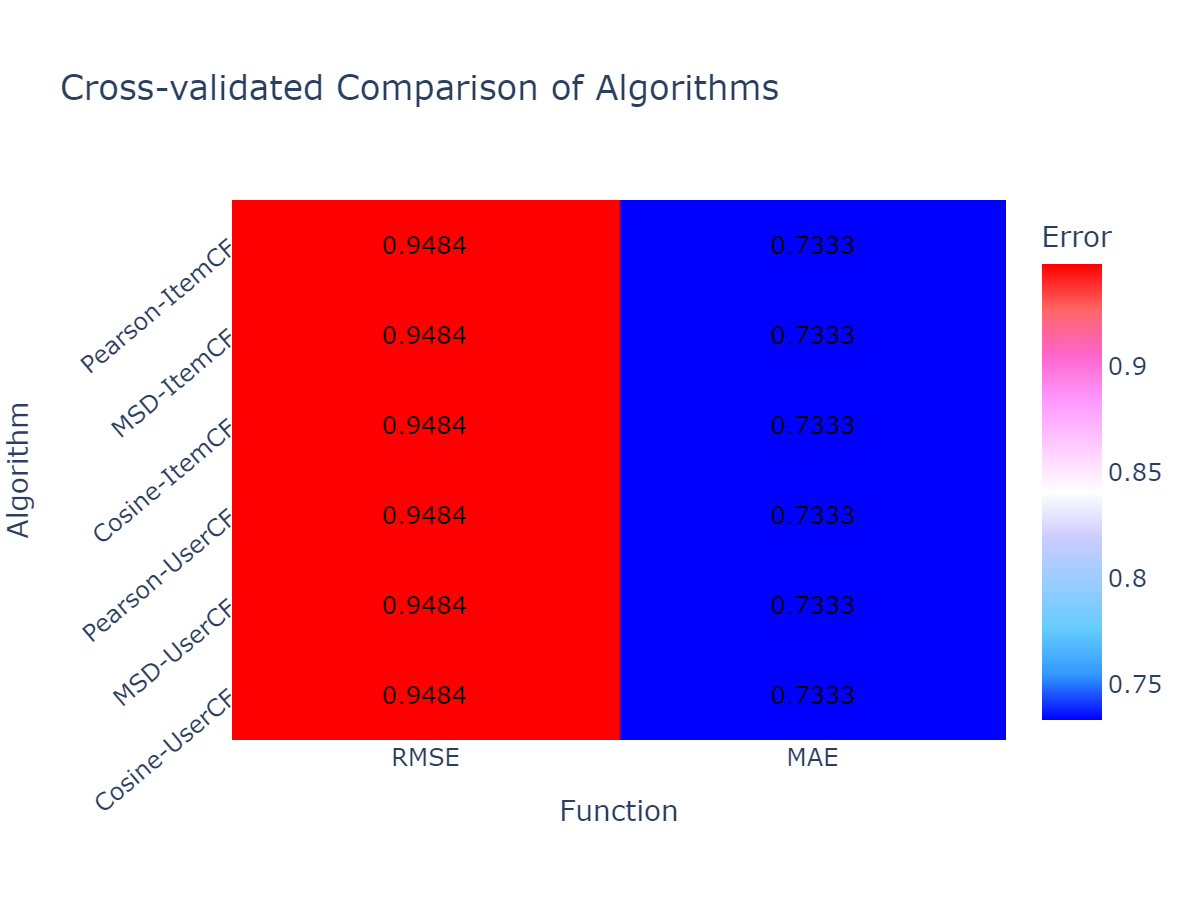

In [131]:
img_bytes = fig.to_image(format = "png", width=600, height=450, scale=2)
Image(img_bytes)

# f- 
Examine how the number of neighbors impacts the performances of User based
Collaborative Filtering and Item based Collaborative Filtering? Plot your results.

In [132]:
# load the data into surprise specific data-structure format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)

In [133]:
# User-based Collaborative Filtering: optimal k
storage3 = []

for i in range(1,30):
    # perform cross validation
    algorithm =KNNBasic(k=i, sim_options = {'name':'MSD','user_based': True})
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # get results & append algorithm names
    result_append = pd.DataFrame.from_dict(results).mean(axis=0)
       
    # Store data
    storage3.append(result_append)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [134]:
# Item-based Collaborative Filtering: optimal k
storage4 = []

for i in range(1,30):
    # perform cross validation
    algorithm = KNNBasic(k=i, sim_options = {'name':'MSD','user_based': False})
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False)
    
    # get results & append algorithm names
    result_append = pd.DataFrame.from_dict(results).mean(axis=0)
        
    # Store data
    storage4.append(result_append)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [135]:

storage3 = pd.DataFrame(storage3)
storage4 = pd.DataFrame(storage4)

acc_userCF1 = storage3['test_rmse']
acc_itemCF1 = storage4['test_rmse']

acc_userCF2 = storage3['test_mae']
acc_itemCF2 = storage4['test_mae']

In [136]:
acc_itemCF1

0     1.257576
1     1.097153
2     1.033792
3     1.000915
4     0.979078
5     0.963824
6     0.954480
7     0.944622
8     0.938591
9     0.932715
10    0.928753
11    0.926073
12    0.922188
13    0.919254
14    0.917792
15    0.915554
16    0.913583
17    0.912340
18    0.911066
19    0.909779
20    0.909051
21    0.907839
22    0.907037
23    0.905917
24    0.905664
25    0.904019
26    0.903955
27    0.903563
28    0.902671
Name: test_rmse, dtype: float64

In [137]:
acc_userCF1

0     1.255150
1     1.089998
2     1.024351
3     0.992881
4     0.972373
5     0.958885
6     0.948405
7     0.941363
8     0.935080
9     0.931081
10    0.928061
11    0.924920
12    0.922463
13    0.920630
14    0.918638
15    0.917279
16    0.915775
17    0.914855
18    0.913985
19    0.913058
20    0.913233
21    0.912514
22    0.911520
23    0.911076
24    0.910777
25    0.910418
26    0.911183
27    0.910098
28    0.909471
Name: test_rmse, dtype: float64

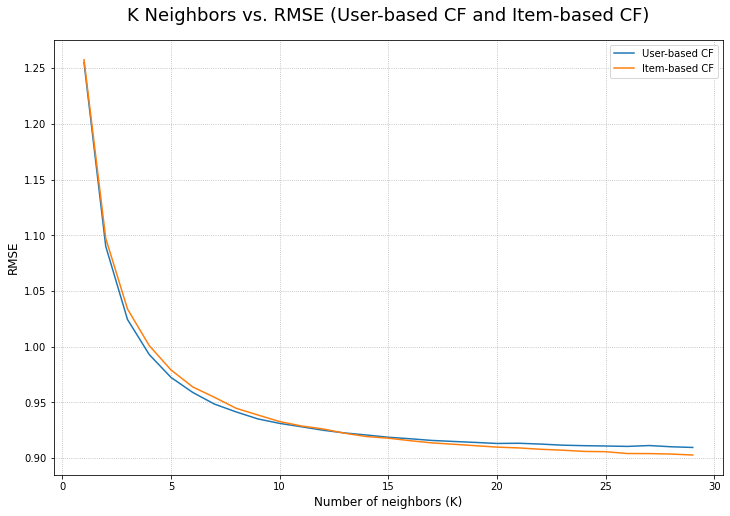

In [138]:
# plotting the results (RMSE)

plt.figure(figsize=(12,8))
plt.plot(range(1,30), acc_userCF1, label = "User-based CF")
plt.plot(range(1,30), acc_itemCF1, label = "Item-based CF")
plt.title('')
plt.xlabel('Number of neighbors (K)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.title('K Neighbors vs. RMSE (User-based CF and Item-based CF)', fontsize=18, y=1.03)
plt.legend(loc='best')
plt.grid(ls='dotted')

plt.savefig("plot_f (RMSE).png", dpi=300)

plt.show()

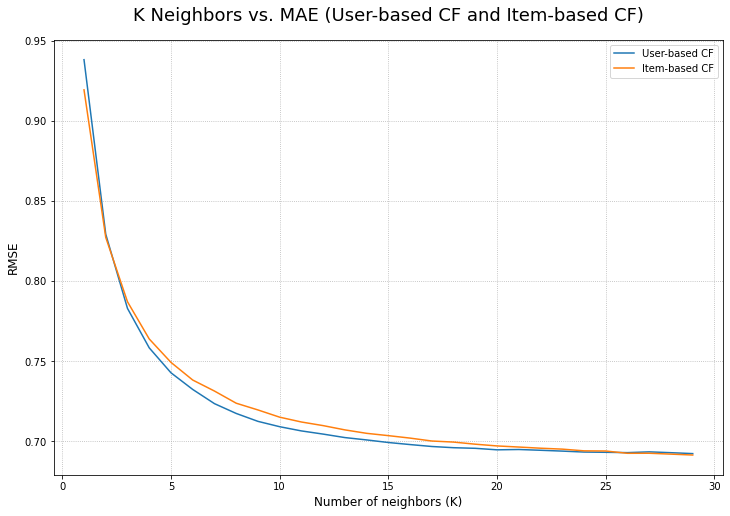

In [139]:
# plotting the results (MAE)

plt.figure(figsize=(12,8))
plt.plot(range(1,30), acc_userCF2, label = "User-based CF")
plt.plot(range(1,30), acc_itemCF2, label = "Item-based CF")
plt.title('')
plt.xlabel('Number of neighbors (K)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.title('K Neighbors vs. MAE (User-based CF and Item-based CF)', fontsize=18, y=1.03)
plt.legend(loc='best')
plt.grid(ls='dotted')

plt.savefig("plot_f (MAE).png", dpi=300)

plt.show()

# g-
Identify the best number of neighbor (denoted by K) for User/Item based
collaborative filtering in terms of RMSE. Is the best K of User based collaborative
filtering the same with the best K of Item based collaborative filtering?

In [140]:
# find out the best number of neighbor (K) for User/Item based collaborative filtering in terms of RMSE
print("For User-based CF, the best number of neighbor (K) is at K =" , acc_userCF1.idxmin()+1, "with minimum RMSE:", min(acc_userCF1))
print("For Item-based CF, the best number of neighbor (K) is at K =" , acc_itemCF1.idxmin()+1 , "with minimum RMSE:", min(acc_itemCF1))

For User-based CF, the best number of neighbor (K) is at K = 29 with minimum RMSE: 0.9094707566730474
For Item-based CF, the best number of neighbor (K) is at K = 29 with minimum RMSE: 0.9026711749002921


In [141]:
# find out the best number of neighbor (K) for User/Item based collaborative filtering in terms of MAE
print("For User-based CF, the best number of neighbor (K) is at K =" , acc_userCF2.idxmin()+1, "with minimum MAE:", min(acc_userCF2))
print("For Item-based CF, the best number of neighbor (K) is at K =" , acc_itemCF2.idxmin()+1 , "with minimum MAE:", min(acc_itemCF2))

For User-based CF, the best number of neighbor (K) is at K = 29 with minimum MAE: 0.6923111164316924
For Item-based CF, the best number of neighbor (K) is at K = 29 with minimum MAE: 0.6914240635231655
